In [9]:
%pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 451.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%config InlineBackend.figure_format = 'retina'

In [2]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x-y)**2)

In [26]:
x_test = np.linspace(-5, 5, 100)
x_point = np.array([1.0])

K_linear_point = np.array([linear_kernel(x_point, xi) for xi in x_test])
K_polynomial_point = np.array([polynomial_kernel(x_point, xi) for xi in x_test])
K_gaussian_point = np.array([gaussian_kernel(x_point, xi) for xi in x_test])
K_gaussian_high_gamma_point = np.array([gaussian_kernel(x_point, xi, gamma=1) for xi in x_test])


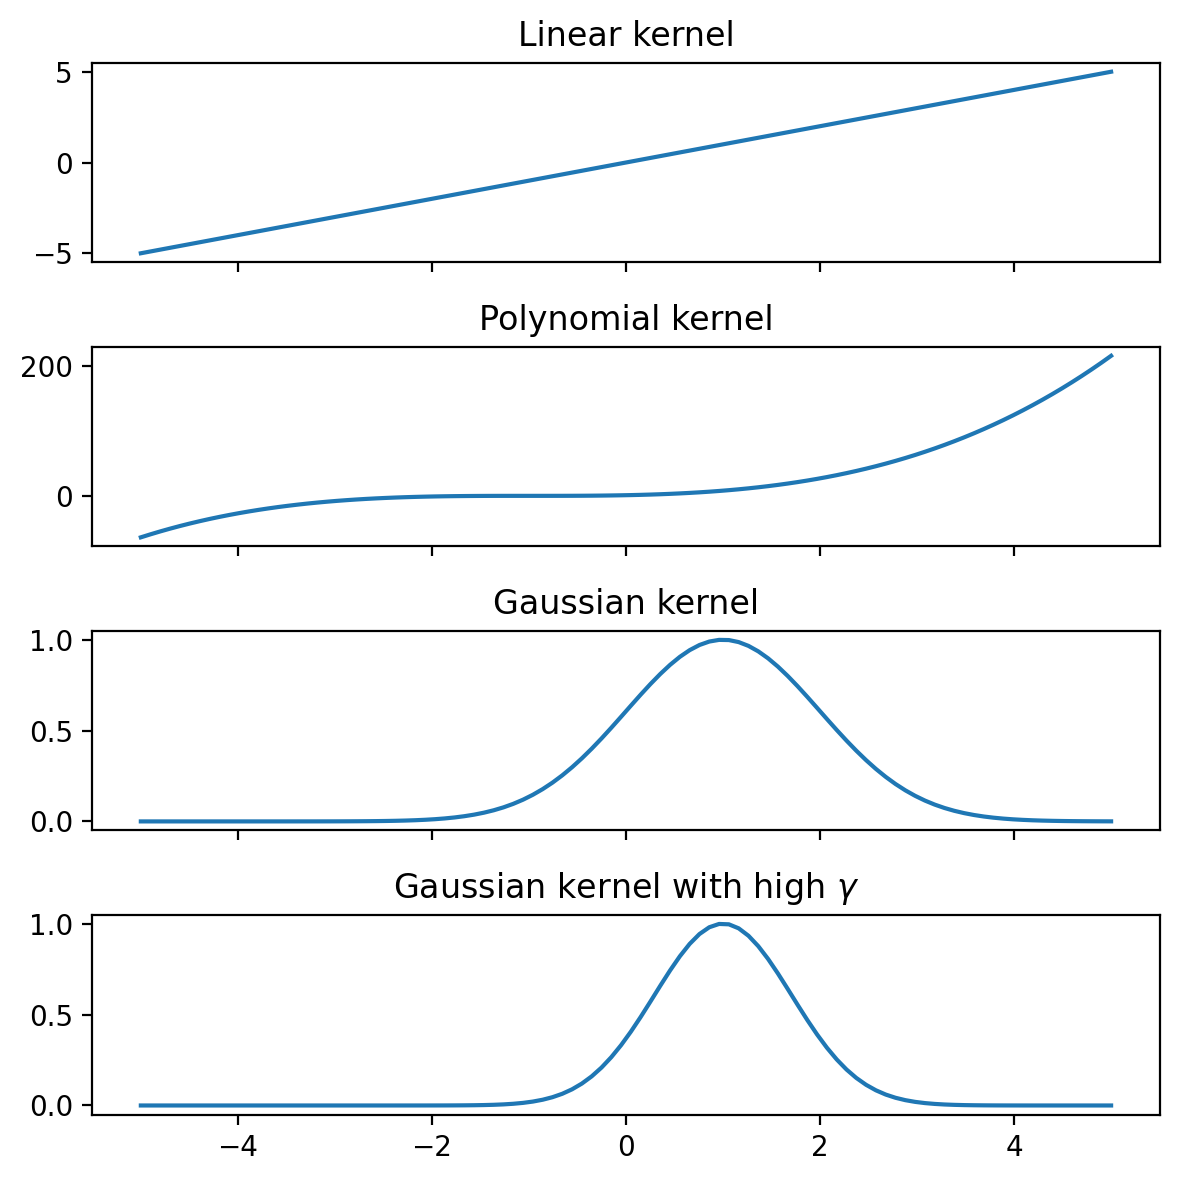

In [27]:
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(6, 6))
ax[0].plot(x_test, K_linear_point)
ax[0].set_title('Linear kernel')
ax[1].plot(x_test, K_polynomial_point)
ax[1].set_title('Polynomial kernel')
ax[2].plot(x_test, K_gaussian_point)
ax[2].set_title('Gaussian kernel')
ax[3].plot(x_test, K_gaussian_high_gamma_point)
ax[3].set_title('Gaussian kernel with high $\gamma$')
plt.tight_layout()


In [22]:
x = np.linspace(-5, 5, 100)

K_lin = np.array([[linear_kernel(xi, xj) for xi in x] for xj in x])
K_poly = np.array([[polynomial_kernel(xi, xj) for xi in x] for xj in x])
K_gauss = np.array([[gaussian_kernel(xi, xj) for xi in x] for xj in x])


In [23]:
trace_lin = go.Heatmap(z=K_lin, x=x, y=x, colorscale='Viridis', name='Linear Kernel')
fig = go.Figure(data=[trace_lin])
fig.update_layout(title='Linear Kernel', width=500, height=500)
fig.show()

In [24]:
trace_rbf = go.Heatmap(z=K_gauss, x=x, y=x, colorscale='Viridis', name='Gaussian Kernel')
fig = go.Figure(data=[trace_rbf])
fig.update_layout(title='Gaussian Kernel', width=500, height=500)
fig.show()

In [38]:
# Plot 1 row 3 cols for various value of gamma in Gaussian kernel using plotly
gammas = [0.1, 1, 5]

fig = make_subplots(rows=1, cols=len(gammas), subplot_titles=[f'Gamma={gamma}' for gamma in gammas])

for i, gamma in enumerate(gammas, 1):
    K_gauss = np.array([[gaussian_kernel(xi, xj, gamma) for xi in x] for xj in x])
    fig.add_trace(go.Heatmap(z=K_gauss, x=x, y=x, colorscale='Viridis'), row=1, col=i)

fig.update_layout(title_text="Gaussian Kernel Heatmaps for Various Gamma Values")
fig.show()

    

SVC(C=1000000.0, kernel='linear')

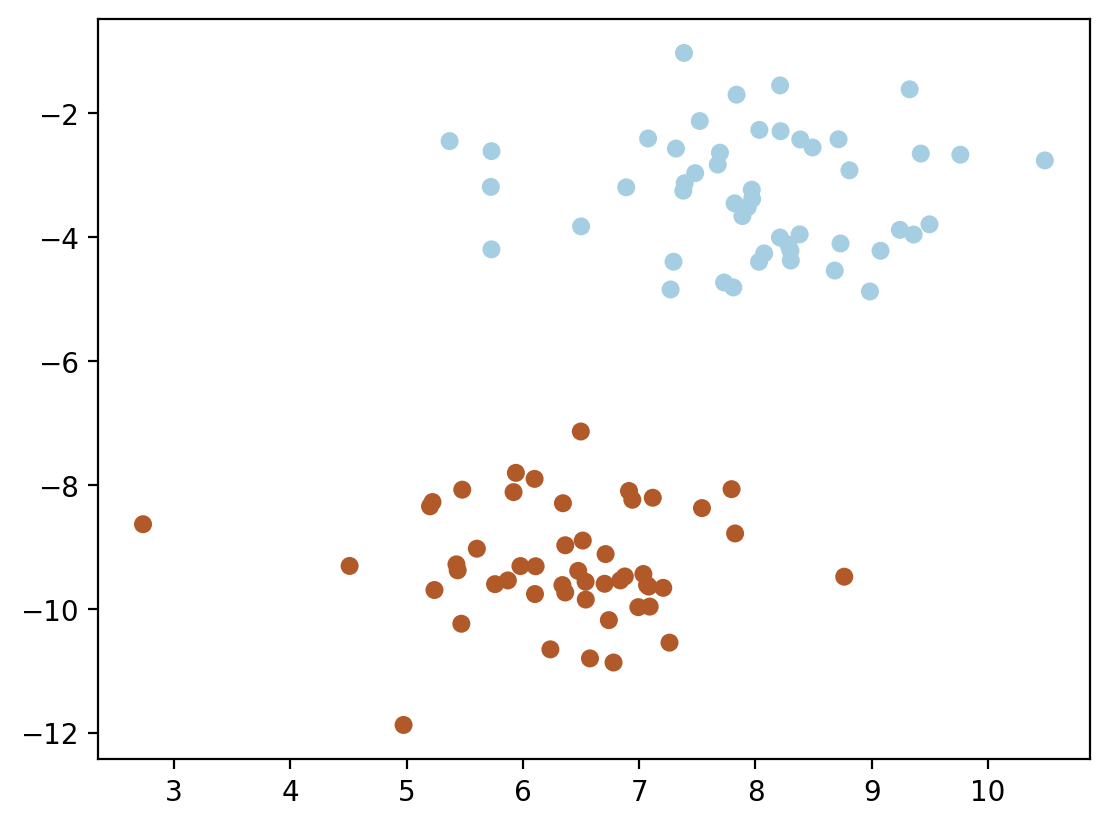

In [40]:
### Understanding how the "similarity" from support vectors to the test point is calculated

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

clf = SVC(kernel='linear', C = 1e6)
clf.fit(X, y)

In [41]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 6.49868019, -7.13530714]])

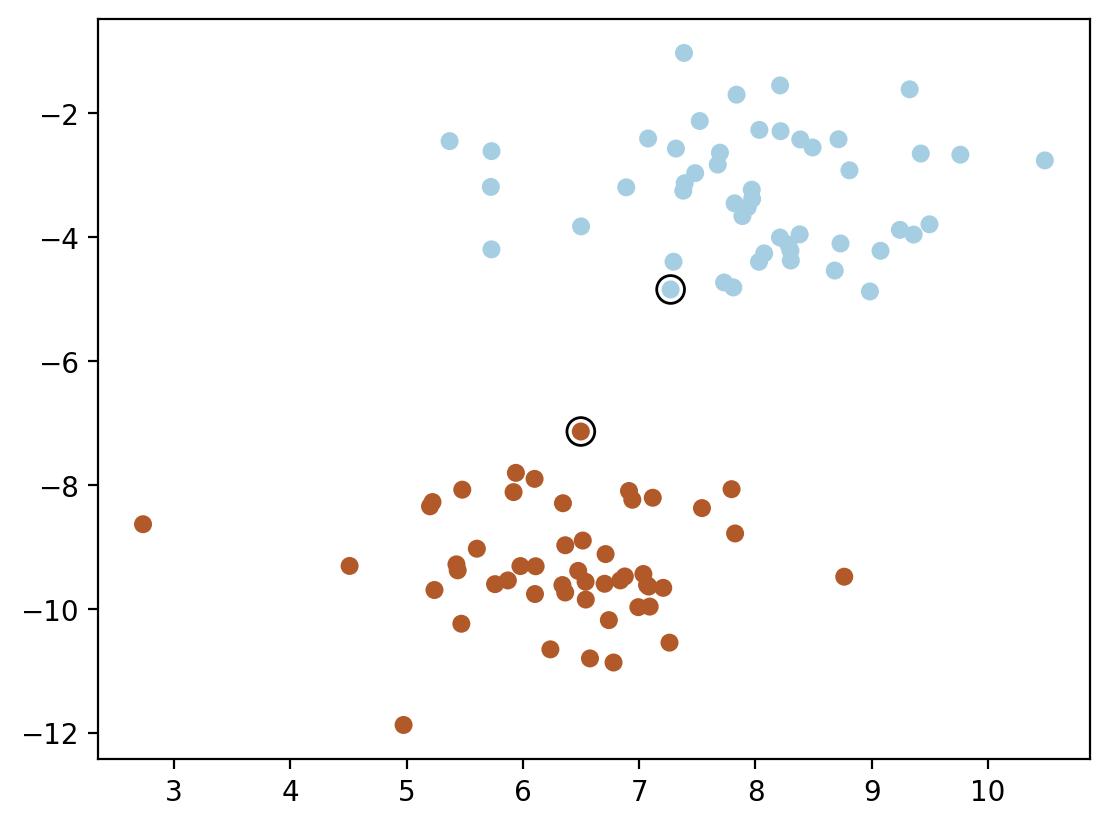

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot scatter with black edge color for support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

# test point
test_point = np.array([6, -4])

def decision_function_test(clf, test_point):
    decision_function = 0
    for i in range(len(clf.support_vectors_)):
        out_i = alpha[i] * y_plus_minus[clf.support_][i] * linear_kernel(clf.support_vectors_[i], test_point)
        print(f'alpha_{i} * y_{clf.support_}[{i}] * K(x_{i}, x_test) = {out_i}')
        decision_function += out_i
    decision_function += clf.intercept_
    return decision_function

In [57]:
clf.dual_coef_

array([[-0.341651,  0.341651]])

In [58]:
alpha = np.abs(clf.dual_coef_.ravel())
y_plus_minus = np.where(y == 0, -1, 1)
y_plus_minus[clf.support_]


array([-1,  1])

In [59]:
from cgi import test


alpha[0], y_plus_minus[clf.support_][0], clf.support_vectors_[0].shape, test_point.shape

(0.3416510021250007, -1, (2,), (2,))

In [60]:
test_point = np.array([[0, 0]])

decision_function_test(clf, test_point)

ValueError: shapes (2,) and (1,2) not aligned: 2 (dim 0) != 1 (dim 0)

### General QP problem
A general QP problem can be formulated as follows:

$$
\begin{align*}
\text{minimize} \quad & \frac{1}{2} x^T P x + q^T x \\
\text{subject to} \quad & G x \leq h \\
& A x = b
\end{align*}
$$

### Solving in Dual

In dual in hard margin SVM, the dual problem is formulated as follows:

$$
\begin{align*}
\text{maximize} \quad & \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} (x^{(i)})^T x^{(j)} \\
\text{subject to} \quad & \alpha_i \geq 0 \quad \text{for} \quad i = 1, 2, \ldots, m \\
& \sum_{i=1}^{m} \alpha_i y^{(i)} = 0
\end{align*}
$$

Or, we can write it in the following form (minimization problem):
$$
\begin{align*}
\text{minimize} \quad & \frac{1}{2} \alpha^T Q \alpha + e^T \alpha \\
\text{subject to} \quad & y^T \alpha = 0 \\
& \alpha \geq 0
\end{align*}
$$

where
$$
\begin{align*}
Q_{ij} & = y^{(i)} y^{(j)} (x^{(i)})^T x^{(j)} \\
e_i & = -1
\end{align*}
$$

we can again write it in the following form using kernel trick:

$$
Q_{ij} = y^{(i)} y^{(j)} K(x^{(i)}, x^{(j)})
$$

where $K(x^{(i)}, x^{(j)}) = (x^{(i)})^T x^{(j)}$ is the kernel function.

Thus, we can now set
$$
\begin{align*}
P & = Q \\
q & = e \\
G & = -I \\
h & = 0 \\
A & = y^T \\
b & = 0
\end{align*}
$$

where $I$ is the identity matrix.



In [6]:
try: 
    import cvxopt
    import cvxopt.solvers

except:
    %pip install cvxopt
    import cvxopt
    import cvxopt.solvers

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

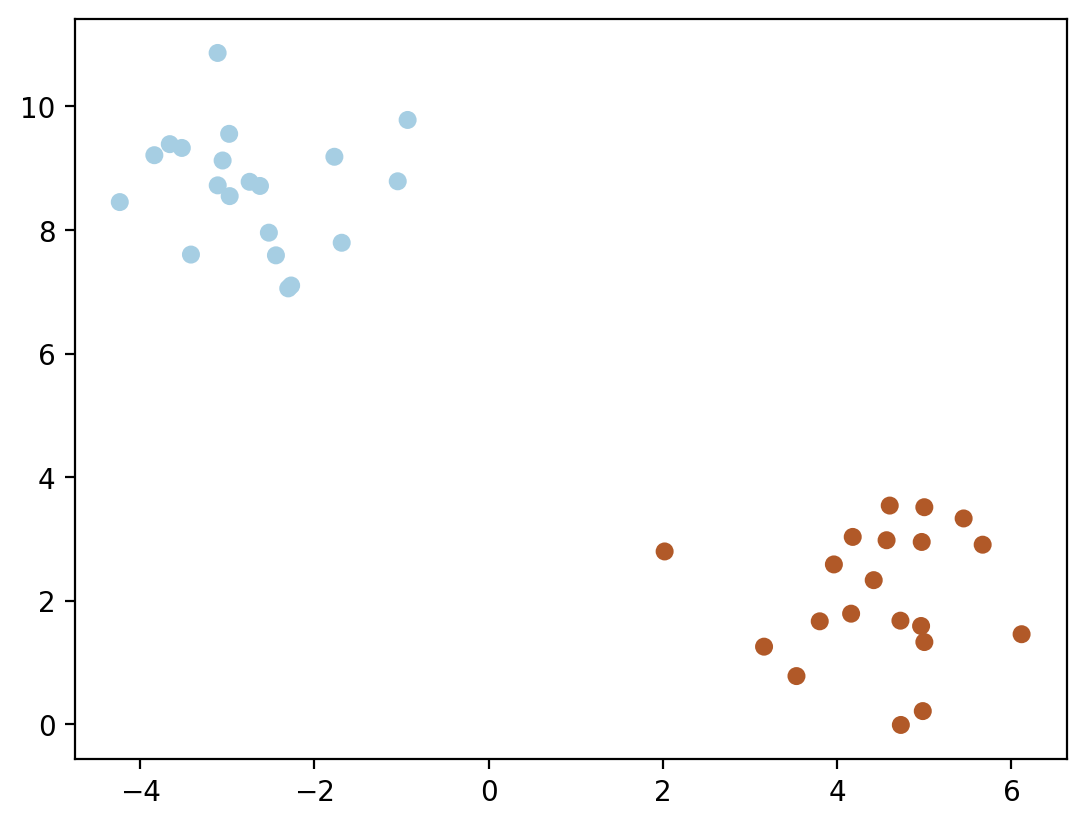

In [28]:
X, y = make_blobs(n_samples=40, centers=2, n_features=2, random_state=42)

y[y == 0] = -1.0
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [29]:
n_samples, n_features = X.shape
kernel = linear_kernel

# Gram matrix
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i,j] = kernel(X[i], X[j])

In [30]:
# QP problem formulation
P = cvxopt.matrix(np.outer(y, y) * K)
q = cvxopt.matrix(-np.ones(n_samples))
A = cvxopt.matrix(y, (1, n_samples), 'd')
b = cvxopt.matrix(0.0)
G = cvxopt.matrix(-np.eye(n_samples))
h = cvxopt.matrix(np.zeros(n_samples))

In [31]:
dictionary = {"P": P, "q": q, "A": A, "b": b, "G": G, "h": h}
for key, val in dictionary.items():
    print(key, val.size)

P (40, 40)
q (40, 1)
A (1, 40)
b (1, 1)
G (40, 40)
h (40, 1)


In [32]:
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.4386e+00 -2.2358e+00  8e+01  8e+00  2e+00
 1: -5.3423e-01 -2.0710e-01  6e+00  7e-01  1e-01
 2:  3.5560e-03 -1.3362e-01  1e-01  4e-16  6e-15
 3: -3.7579e-02 -5.5490e-02  2e-02  4e-17  7e-16
 4: -5.0978e-02 -5.6104e-02  5e-03  9e-19  6e-16
 5: -5.4114e-02 -5.4359e-02  2e-04  1e-17  6e-16
 6: -5.4321e-02 -5.4336e-02  1e-05  7e-18  8e-16
 7: -5.4333e-02 -5.4333e-02  1e-07  1e-17  7e-16
 8: -5.4333e-02 -5.4333e-02  1e-09  2e-17  6e-16
Optimal solution found.


In [33]:
alphas_sol = np.array(solution['x']).flatten()
alphas_sol

array([4.81116795e-11, 5.57561687e-11, 4.14022254e-11, 5.64570278e-11,
       3.19971594e-11, 1.13766765e-09, 1.10946709e-10, 5.43328120e-02,
       9.43563733e-11, 3.59644883e-11, 2.72365634e-11, 1.78702226e-08,
       7.91651647e-11, 4.45973348e-11, 6.48044988e-11, 3.09926966e-11,
       3.26557350e-11, 4.12118866e-11, 2.53367783e-10, 4.55829611e-11,
       4.43685787e-11, 6.12190291e-11, 5.72210101e-11, 3.48077854e-11,
       2.70414582e-11, 3.72073366e-11, 4.52326326e-11, 6.21623048e-11,
       3.61239404e-11, 3.61946755e-11, 2.70499880e-11, 6.76419169e-11,
       3.77922165e-11, 9.70279801e-11, 4.63391531e-11, 6.74255180e-11,
       3.77950852e-11, 5.47202347e-11, 5.02000180e-11, 5.43328313e-02])

In [34]:
alphas_sol[alphas_sol > 1e-5]

array([0.05433281, 0.05433283])

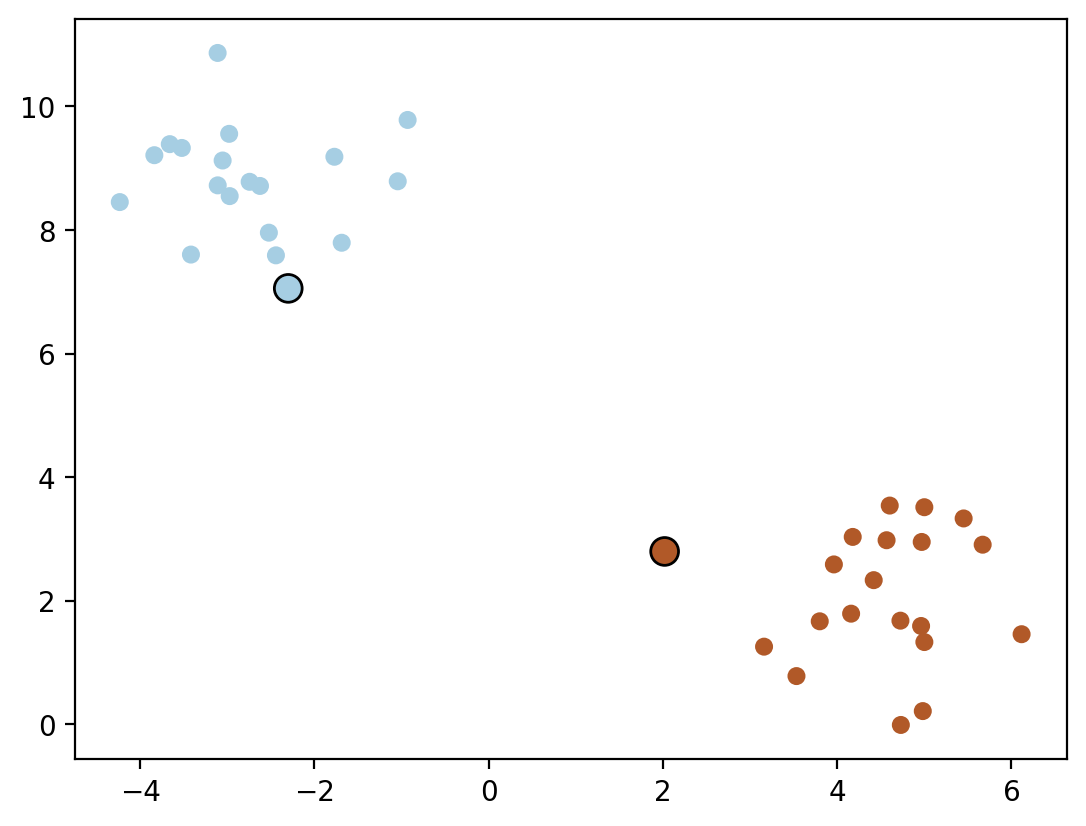

In [35]:
# Support vectors have non zero lagrange multipliers
sv = alphas_sol > 1e-5
ind = np.arange(len(alphas_sol))[sv]
a = alphas_sol[sv]
sv_x = X[sv]
sv_y = y[sv]

# Plot the support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Mark the support vectors with thick black circles
plt.scatter(sv_x[:, 0], sv_x[:, 1], c=sv_y, s=100, cmap=plt.cm.Paired, marker='o', edgecolors='k')

In [36]:
w = np.sum(a * sv_y[:, None] * sv_x, axis=0)
w

array([ 0.23474316, -0.23143308])

In [37]:
b = np.sum(sv_y - np.dot(sv_x, w)) / len(sv_y)
b

1.1726593683601716

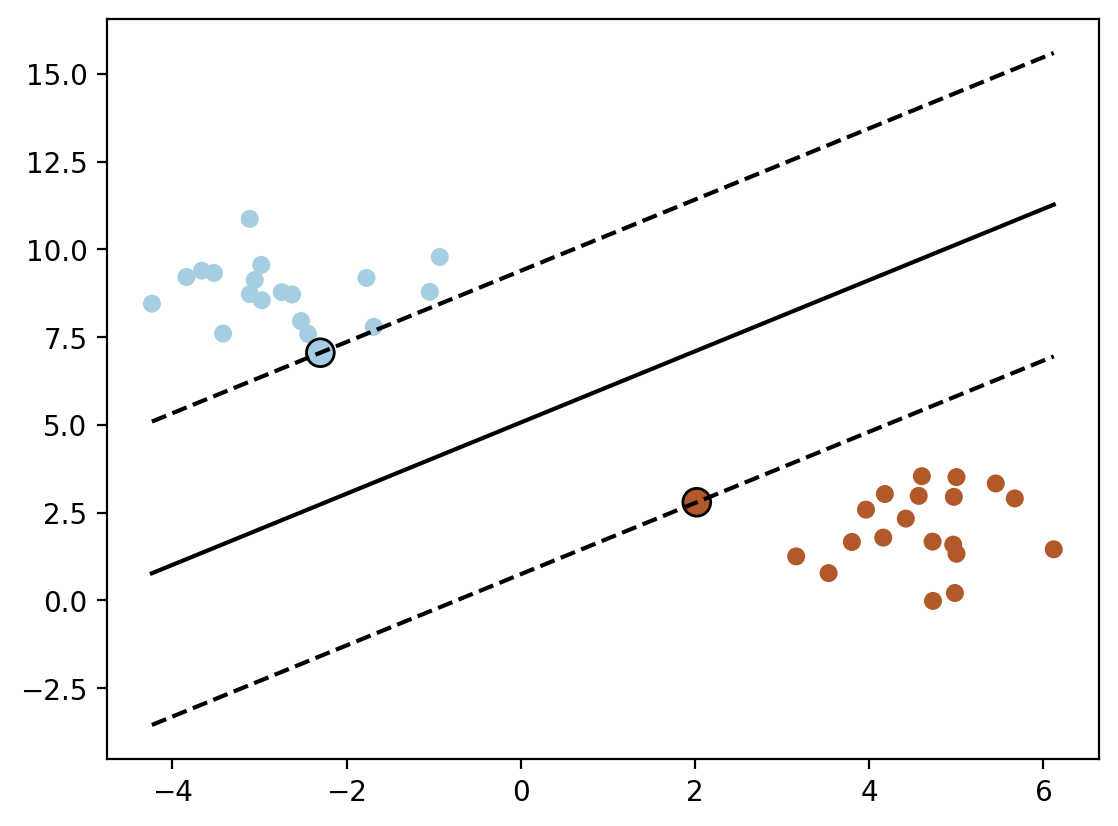

In [38]:
# Plot the decision boundary and margins
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(sv_x[:, 0], sv_x[:, 1], c=sv_y, s=100, cmap=plt.cm.Paired, marker='o', edgecolors='k')

x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])

y_min = (-w[0] * x_min - b) / w[1]
y_max = (-w[0] * x_max - b) / w[1]

plt.plot([x_min, x_max], [y_min, y_max], 'k-')

# Margin 1
y_min = (-w[0] * x_min - b + 1) / w[1]
y_max = (-w[0] * x_max - b + 1) / w[1]

plt.plot([x_min, x_max], [y_min, y_max], 'k--')

# Margin 2
y_min = (-w[0] * x_min - b - 1) / w[1]
y_max = (-w[0] * x_max - b - 1) / w[1]

plt.plot([x_min, x_max], [y_min, y_max], 'k--')



### Solving in Primal

\begin{align*}
\text{minimize} \quad & \frac{1}{2} ||w||^2 \\
\text{subject to} \quad & y_i(w^T x_i + b) \geq 1 \quad \text{for all} \quad i = 1, 2, \ldots, m
\end{align*}

The QP problem can be written as:

\begin{align*}
\text{minimize} \quad & \frac{1}{2} \begin{pmatrix} w \\ b \end{pmatrix}^T \begin{pmatrix} I & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} w \\ b \end{pmatrix} \\
\text{subject to} \quad & -\begin{pmatrix} \text{diag}(\mathbf{y}) \cdot X & \mathbf{y} \end{pmatrix} \begin{pmatrix} w \\ b \end{pmatrix} \leq -\mathbf{1}
\end{align*}

where  $I$ is the identity matrix, $\mathbf{y}$ is the vector of labels, $X$ is the matrix of data points, and $\mathbf{1}$ is a vector of ones.


In [41]:
# Number of features
n_features = X.shape[1]

# Identity matrix
P = cvxopt.matrix(np.block([[np.eye(n_features), np.zeros((n_features, 1))], [np.zeros((1, n_features + 1))]]))

# Inequality constraints matrix
G = cvxopt.matrix(-np.block([np.diag(y) @ X, y.reshape(-1, 1)]))

# Inequality constraints bounds
h = cvxopt.matrix(-np.ones(X.shape[0]))

# Solve the QP problem
solution = cvxopt.solvers.qp(P, cvxopt.matrix(np.zeros(n_features + 1)), G, h)

# Extract optimized w and b values
w_opt = np.array(solution['x'][:-1])
b_opt = np.array(solution['x'][-1])

     pcost       dcost       gap    pres   dres
 0:  1.9726e-02  3.3304e+00  8e+01  2e+00  3e+02
 1:  1.2482e-01 -5.6113e+00  6e+00  1e-01  2e+01
 2:  1.3362e-01 -3.5560e-03  1e-01  4e-16  5e-15
 3:  5.5490e-02  3.7579e-02  2e-02  3e-16  3e-16
 4:  5.6104e-02  5.0978e-02  5e-03  2e-16  1e-16
 5:  5.4359e-02  5.4114e-02  2e-04  2e-16  1e-16
 6:  5.4336e-02  5.4321e-02  1e-05  2e-16  2e-15
 7:  5.4333e-02  5.4333e-02  1e-07  3e-16  2e-16
 8:  5.4333e-02  5.4333e-02  1e-09  2e-16  3e-16
Optimal solution found.


In [42]:
w_opt

array([[ 0.23474325],
       [-0.23143308]])

In [43]:
b_opt

array(1.17265942)